In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

***
# Load df_movements
***

### Load all takeoffs, irrespective of aircraft type

In [29]:
# Concatinate df_movements of multiple months
file_paths = ['LSZH_MAY24_1_df_movements.pkl', 'LSZH_MAY24_2_df_movements.pkl', 'LSZH_MAY24_3_df_movements.pkl',
              'LSZH_JUN24_1_df_movements.pkl', 'LSZH_JUN24_2_df_movements.pkl', 'LSZH_JUN24_3_df_movements.pkl',
              'LSZH_JUL24_1_df_movements.pkl', 'LSZH_JUL24_2_df_movements.pkl', 'LSZH_JUL24_3_df_movements.pkl',
              'LSZH_AUG24_1_df_movements.pkl', 'LSZH_AUG24_2_df_movements.pkl', 'LSZH_AUG24_3_df_movements.pkl',
              'LSZH_SEP24_1_df_movements.pkl', 'LSZH_SEP24_2_df_movements.pkl', 'LSZH_SEP24_3_df_movements.pkl',
              ]


df_list = [pd.read_pickle(file) for file in file_paths]
#df_allMovements = pd.concat(df_list, ignore_index=True).convert_dtypes()
df_allMovements = pd.concat(df_list, ignore_index=True)

# Filter for takeoff only
df_allMovements = df_allMovements.query('isTakeoff', engine='python')

# Get rid of departures classified as runway 14 -> These are outliers (no aircraft take off on runway 14 at ZRH in real life)
df_allMovements = df_allMovements.query('takeoffRunway!="14"')

# Number of Takeoffs, irrespective of aircraft type
df_allMovements.to_pickle('movements_LSZH.pkl')

df_allMovements

,flight_id,icao24,callsign,isTakeoff,isPushback,startPushback,startTaxi,lineupTime,taxiDuration,taxiDistance,takeoffRunway,parking_position,typecode,icaoaircrafttype,min_compute_gs_diff,max_compute_gs_diff,max_cumdist_diff,first_altitude
0,4XCUT_11707,73957c,4XCUT,True,False,<NA>,2024-05-03 08:28:20+00:00,2024-05-03 08:31:59+00:00,0 days 00:03:39,0.73841,32,<NA>,H25B,L2J,-53.954864,112.886397,0.047294,<NA>
1,4XCUT_11710,73957c,4XCUT,True,False,<NA>,2024-05-04 20:10:36+00:00,2024-05-04 20:13:40+00:00,0 days 00:03:04,0.628165,32,<NA>,H25B,L2J,-97.373377,174.613542,0.063692,<NA>
2,AAL93_11938,aae1ea,AAL93,True,False,<NA>,2024-05-05 09:51:52+00:00,2024-05-05 10:04:55+00:00,0 days 00:13:03,1.250523,16,<NA>,B788,L2J,-98.564214,115.477238,0.068575,<NA>
3,AAL93_11941,aae597,AAL93,True,False,<NA>,2024-05-01 09:56:35+00:00,2024-05-01 10:03:06+00:00,0 days 00:06:31,1.237633,16,E33,B788,L2J,-119.86761,173.205505,0.063253,<NA>
4,AAL93_11945,ab1839,AAL93,True,False,<NA>,2024-05-09 10:06:29+00:00,2024-05-09 10:19:47+00:00,0 days 00:13:18,1.0074,10,<NA>,B788,L2J,-87.073225,87.754683,0.047843,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53370,VTUDR_11470,80067a,VTUDR,True,False,<NA>,2024-09-29 06:11:19+00:00,2024-09-29 06:14:52+00:00,0 days 00:03:33,0.633613,32,<NA>,H25B,L2J,-77.697809,87.671512,0.038036,<NA>
53371,VVV221_1786,4912c8,VVV221,True,False,<NA>,2024-09-30 08:42:12+00:00,2024-09-30 08:44:31+00:00,0 days 00:02:19,0.176634,28,<NA>,C25B,L2J,-98.966963,73.590965,0.042905,<NA>
53372,VVV223_1788,4912c8,VVV223,True,False,<NA>,2024-09-30 17:09:41+00:00,2024-09-30 17:12:04+00:00,0 days 00:02:23,0.14072,28,<NA>,C25B,L2J,-93.137572,93.491305,0.042501,1325.0
53373,VVV621_1784,4911ec,VVV621,True,False,<NA>,2024-09-23 08:32:14+00:00,2024-09-23 08:34:34+00:00,0 days 00:02:20,0.134382,28,<NA>,C25B,L2J,-58.775437,78.542176,0.038867,<NA>


### Load movements relevant for AGPS useage

In [30]:
# Read df_movements (df_movements is the output of agps_proc.ipynb)
df_movements = pd.read_pickle('LSZH_MAY_SEP_df_movements_new.pkl')

# Filter for takeoff only
df_movements = df_movements.query('isTakeoff', engine='python')

# Get rid of departures classified as runway 14 -> These are outliers (no aircraft take off on runway 14 at ZRH in real life)
df_movements = df_movements.query('takeoffRunway!="14"')

df_movements


,flight_id,icao24,callsign,isTakeoff,isPushback,startPushback,startTaxi,lineupTime,taxiDuration,taxiDistance,...,APUhighFF,APUnormalFF,MESengine,MESapu,normTAXIengine,extAGPSapu,extAGPStug,MESengine180,MESapu180,normTAXIengine180
2,AAL93_11938,aae1ea,AAL93,True,False,<NA>,2024-05-05 09:51:52+00:00,2024-05-05 10:04:55+00:00,0 days 00:13:03,1.250523,...,262,238,93.66,16.666667,349.218,51.765,NaN,120.42,20.633333,349.218
3,AAL93_11941,aae597,AAL93,True,False,<NA>,2024-05-01 09:56:35+00:00,2024-05-01 10:03:06+00:00,0 days 00:06:31,1.237633,...,262,238,93.66,16.666667,174.386,25.849444,NaN,120.42,20.633333,174.386
4,AAL93_11945,ab1839,AAL93,True,False,<NA>,2024-05-09 10:06:29+00:00,2024-05-09 10:19:47+00:00,0 days 00:13:18,1.0074,...,262,238,93.66,16.666667,355.908,52.756667,NaN,120.42,20.633333,355.908
5,AAL93_11947,ab1fa7,AAL93,True,False,<NA>,2024-05-03 09:44:34+00:00,2024-05-03 09:56:52+00:00,0 days 00:12:18,0.440692,...,262,238,93.66,16.666667,329.148,48.79,NaN,120.42,20.633333,329.148
6,AAL93_11950,ab236a,AAL93,True,False,<NA>,2024-05-04 09:44:18+00:00,2024-05-04 09:52:56+00:00,0 days 00:08:38,0.69721,...,262,238,93.66,16.666667,231.028,34.245556,NaN,120.42,20.633333,231.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53354,VLG7516_174,344099,VLG7516,True,False,<NA>,2024-09-27 12:52:21+00:00,2024-09-27 12:55:13+00:00,0 days 00:02:52,0.305183,...,130,110,44.94,8.000000,36.808,5.255556,NaN,57.78,9.833333,36.808
53355,VLG7516_222,344697,VLG7516,True,False,<NA>,2024-09-30 08:53:38+00:00,2024-09-30 08:55:29+00:00,0 days 00:01:51,0.332877,...,130,110,44.94,8.000000,23.754,3.391667,NaN,57.78,9.833333,23.754
53356,VLG7516_247,345645,VLG7516,True,False,<NA>,2024-09-23 08:40:45+00:00,2024-09-23 08:46:04+00:00,0 days 00:05:19,0.881704,...,130,110,44.94,8.000000,68.266,9.747222,NaN,57.78,9.833333,68.266
53357,VLG7516_270,346090,VLG7516,True,False,<NA>,2024-09-25 12:47:38+00:00,2024-09-25 12:52:50+00:00,0 days 00:05:12,0.307059,...,130,110,33.60,8.000000,49.92,9.533333,NaN,43.20,9.833333,49.92


***
# Overview on Dataset
***

**Note:** The output of this block (i.e. the latex table) is Table 1 shown in the paper

In [ ]:
import agps_funs
import pandas as pd
import numpy as np
import importlib

importlib.reload(agps_funs)

overview = df_allMovements.groupby('takeoffRunway')['taxiDuration'].agg(['count', 'mean', 'std']).reset_index()

# Calculate mean and std for 'taxiDistance'
taxi_distance_agg = df_allMovements.groupby('takeoffRunway').agg(
    mean_taxiDistance=('taxiDistance', 'mean'),
    std_taxiDistance=('taxiDistance', 'std')
).reset_index()

# Merge
overview = pd.merge(overview, taxi_distance_agg, on='takeoffRunway', how='left')

# Add FZAG counts
overview['count_FZAG'] = [1059, 6122, 35341, 15947, 753]

# Calculate Delta
overview['Delta'] = (overview['count'] - overview['count_FZAG']) / overview['count_FZAG'] * 100

# Convert mean and std to "MM:SS" with LaTeX \text{}
overview['mean'] = pd.to_timedelta(overview['mean']).apply(
    lambda x: f"\\text{{{int(x.total_seconds() // 60):02}:{int(x.total_seconds() % 60):02}}}"
)
overview['std'] = pd.to_timedelta(overview['std']).apply(
    lambda x: f"\\text{{{int(x.total_seconds() // 60):02}:{int(x.total_seconds() % 60):02}}}"
)

# Format Delta as percentage with one decimal and \%
overview['Delta'] = overview['Delta'].apply(lambda x: f"{x:.2f} \\%")

# Round taxi distances
overview['mean_taxiDistance'] = overview['mean_taxiDistance'].round(2)
overview['std_taxiDistance'] = overview['std_taxiDistance'].round(2)

# Ensure integer type for counts
overview['count'] = overview['count'].astype(int)
overview['count_FZAG'] = overview['count_FZAG'].astype(int)

# Drop the "all" row if present
overview = overview[overview['takeoffRunway'] != 'all']

# Reorder columns
overview = overview[['takeoffRunway', 'mean', 'std', 'mean_taxiDistance', 'std_taxiDistance', 'count', 'count_FZAG', 'Delta']]

# Calculate "overall" stats
overall_mean_td = pd.to_timedelta(df_allMovements['taxiDuration'].mean())
overall_std_td = pd.to_timedelta(df_allMovements['taxiDuration'].std())
overall_mean_dist = df_allMovements['taxiDistance'].mean()
overall_std_dist = df_allMovements['taxiDistance'].std()
overall_count = overview['count'].sum()
overall_count_fzag = overview['count_FZAG'].sum()
overall_delta = (overall_count - overall_count_fzag) / overall_count_fzag * 100

# Format overall row values
overall_mean_td_str = f"\\text{{{int(overall_mean_td.total_seconds() // 60):02}:{int(overall_mean_td.total_seconds() % 60):02}}}"
overall_std_td_str = f"\\text{{{int(overall_std_td.total_seconds() // 60):02}:{int(overall_std_td.total_seconds() % 60):02}}}"
overall_delta_str = f"{overall_delta:.2f} \\%"

# === Build LaTeX table manually ===
latex_lines = [
    "\\begin{tabular}{lllrrrrr}",
    "\\toprule",
    "takeoffRunway & mean & std & mean\\_taxiDistance & std\\_taxiDistance & count & count\\_FZAG & Delta \\\\",
    "\\midrule"
]

for _, row in overview.iterrows():
    line = (
        f"{row['takeoffRunway']} & {row['mean']} & {row['std']} & "
        f"{row['mean_taxiDistance']:.2f} & {row['std_taxiDistance']:.2f} & "
        f"{row['count']} & {row['count_FZAG']} & {row['Delta']} \\\\"
    )
    latex_lines.append(line)

# Append overall row
latex_lines.append("\\midrule")
latex_lines.append(
    f"Overall & {overall_mean_td_str} & {overall_std_td_str} & "
    f"{overall_mean_dist:.2f} & {overall_std_dist:.2f} & "
    f"{overall_count} & {overall_count_fzag} & {overall_delta_str} \\\\"
)

latex_lines.append("\\bottomrule")
latex_lines.append("\\end{tabular}")

# Combine all lines
latex_output = "\n".join(latex_lines)

# Print LaTeX table
print(latex_output)

\begin{tabular}{lllrrrrr}
\toprule
takeoffRunway & mean & std & mean\_taxiDistance & std\_taxiDistance & count & count\_FZAG & Delta \\
\midrule
10 & \text{09:56} & \text{05:00} & 1.04 & 0.32 & 974 & 1059 & -8.03 \% \\
16 & \text{12:48} & \text{05:27} & 1.55 & 0.34 & 5220 & 6122 & -14.73 \% \\
28 & \text{07:20} & \text{04:25} & 0.74 & 0.42 & 32102 & 35341 & -9.16 \% \\
32 & \text{07:59} & \text{04:34} & 0.75 & 0.35 & 14474 & 15947 & -9.24 \% \\
34 & \text{09:53} & \text{05:50} & 0.98 & 0.50 & 605 & 753 & -19.65 \% \\
\midrule
Overall & \text{08:07} & \text{04:52} & 0.83 & 0.46 & 53375 & 59222 & -9.87 \% \\
\bottomrule
\end{tabular}


In [32]:
# Average Fuel Consumption per Taxi Movement
total_TaxiFuel = df_movements['MESengine'].sum() + df_movements['MESapu'].sum() + df_movements['normTAXIengine'].sum()
taxiFuel_per_movement = total_TaxiFuel / len(df_movements)
print(f"Average Fuel Consumption per Taxi Movement: {taxiFuel_per_movement:.2f} kg, over {len(df_movements)} movements")

# Average Fuel Consumption of A320 Familly
a320_family = ['A320', 'A321', 'A20N', 'A319', 'A21N']
df_filter = df_movements.query('typecode in @a320_family')
total_TaxiFuel = df_filter['MESengine'].sum() + df_filter['MESapu'].sum() + df_filter['normTAXIengine'].sum()
taxiFuel_per_movement = total_TaxiFuel / len(df_filter)
print(f"Average Fuel Consumption per A320 Family Taxi Movement: {taxiFuel_per_movement:.2f} kg, over {len(df_filter)} movements")



Average Fuel Consumption per Taxi Movement: 190.69 kg, over 46419 movements
Average Fuel Consumption per A320 Family Taxi Movement: 152.42 kg, over 21102 movements


***
# Plotting
***

This part contains the code for Figures 3, 4, and 5 shown in the paper

In [33]:
# Some layout settings for the plots
fontsize_ticks = 14
fontsize_xylabels = 16
fontsize_title = 16

### Taxi Distance and Taxi Duration

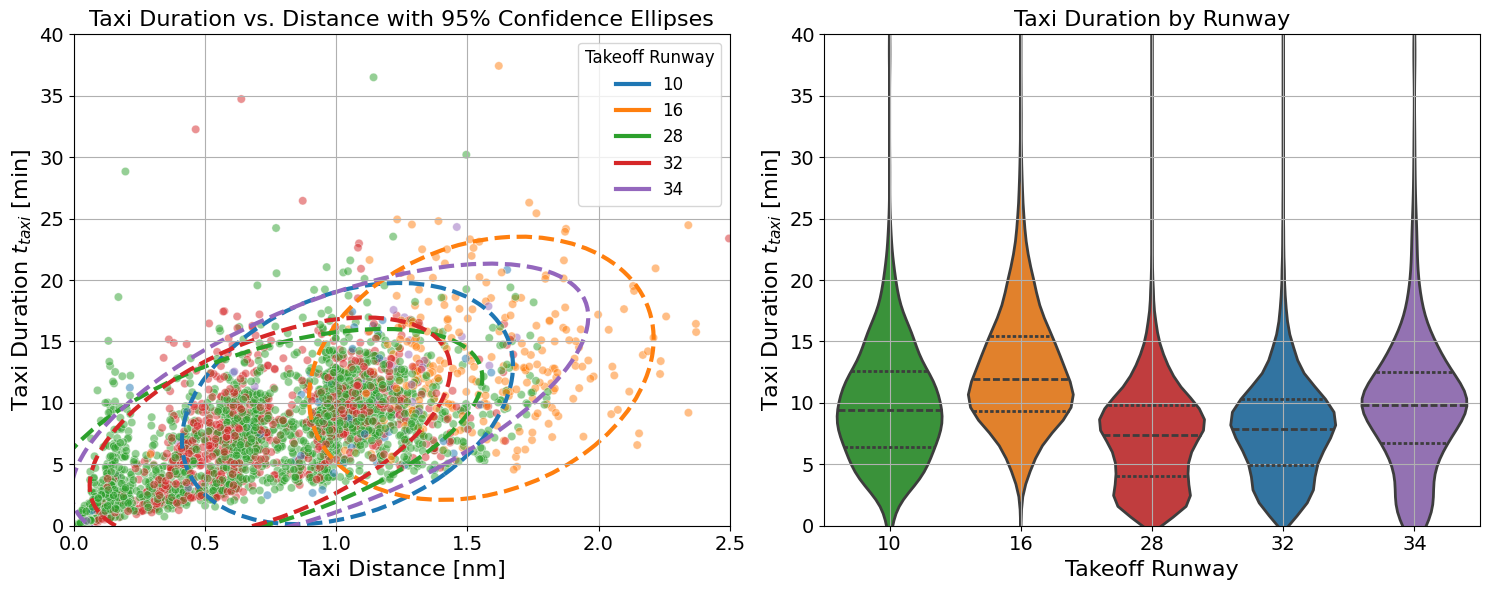

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D
import seaborn as sns

# Define the limits for the x and y axes
max_xlim = 2.5      # Taxi Distance [NM]
max_ylim = 40       # Taxi Duration [min]


# Convert taxiDuration to total seconds for scatter plotting
df_allMovements['taxiDuration_minutes'] = df_allMovements['taxiDuration'].dt.total_seconds()/60

# Filter out rows where takeoffRunway is "14"
df_filtered = df_allMovements[df_allMovements['takeoffRunway'] != '14']

# Get rid of the worst outliers
df_filtered = df_filtered.query('taxiDistance < 7.5').query('taxiDuration_minutes < 3000')

# Set a nicer color palette
sns.set_palette("tab10")

# Function to draw an ellipse representing the 95% confidence interval
def confidence_ellipse(x, y, ax, n_std=1.96, edgecolor='black', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radii.

    edgecolor : str
        The color of the ellipse's edge.

    kwargs : dict
        Additional keyword arguments to `matplotlib.patches.Ellipse`.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, edgecolor=edgecolor, facecolor='none', linewidth=3, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    transf = (
        transforms.Affine2D()
        .rotate_deg(45)
        .scale(scale_x, scale_y)
        .translate(mean_x, mean_y)
    )

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Number of sampled points 
n = 3000

# Ensure we do not sample more points than available in the DataFrame
n = min(n, len(df_filtered))

# Randomly sample n points from the DataFrame
df_sampled = df_filtered.sample(n)

# Specify the desired order for takeoff runways
runway_order = ['10', '16', '28', '32', '34']

######## Subplot 0 #########

# Left subplot: Scatter plot of Taxi Duration vs. Taxi Distance colored by takeoffRunway
scatter = sns.scatterplot(
    data=df_sampled,
    x='taxiDistance', 
    y='taxiDuration_minutes', 
    hue='takeoffRunway', 
    palette='tab10', 
    hue_order=runway_order, 
    ax=axs[0],
    alpha=0.5,
    legend=False
)

# Get the current color palette and map it to runways using the specified order
palette = sns.color_palette("tab10", len(runway_order))
runway_colors = {runway: palette[i] for i, runway in enumerate(runway_order)}

# Add 95% confidence ellipses for each runway
for runway in runway_order:
    subset = df_filtered[df_filtered['takeoffRunway'] == runway]
    confidence_ellipse(
        subset['taxiDistance'], 
        subset['taxiDuration_minutes'],
        axs[0], 
        edgecolor=runway_colors[runway],  # Use the mapped color for the runway
        linestyle='--',
        alpha=1,
    )

axs[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[0].set_xlabel('Taxi Distance [nm]', fontsize = fontsize_xylabels)
axs[0].set_ylabel('Taxi Duration $t_{taxi}$ [min]', fontsize=fontsize_xylabels)
axs[0].set_title('Taxi Duration vs. Distance with 95% Confidence Ellipses', fontsize=fontsize_title)
axs[0].grid(True)
axs[0].set_ylim((0,max_ylim))
axs[0].set_xlim((0,max_xlim))

# Create custom legend handles for the ellipses based on runway_order to ensure proper order
custom_lines = [Line2D([0], [0], color=runway_colors[runway], lw=3) for runway in runway_order]
axs[0].legend(custom_lines, runway_order, 
              title='Takeoff Runway', 
              fontsize=12, 
              title_fontsize=12,
              loc='upper right')


######## Subplot 1 #########

# Right subplot: Violin plot of Taxi Distances for each runway in the specified order
sns.violinplot(
    data=df_filtered,
    x='takeoffRunway',
    y='taxiDuration_minutes',
    hue='takeoffRunway',
    palette='tab10',
    legend=False,
    order=runway_order,
    ax=axs[1],
    inner='quartile',
    linewidth=2
)

axs[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[1].set_xlabel('Takeoff Runway', fontsize=fontsize_xylabels)
axs[1].set_ylabel('Taxi Duration $t_{taxi}$ [min]', fontsize=fontsize_xylabels)
axs[1].set_title('Taxi Duration by Runway', fontsize=fontsize_title)
axs[1].grid(True)
axs[1].set_ylim((0, max_ylim))

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('taxi_distance_duration_MAY_SEP24.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

### Taxi Fuel Consumption = f(Minimum Taxi Duration) 

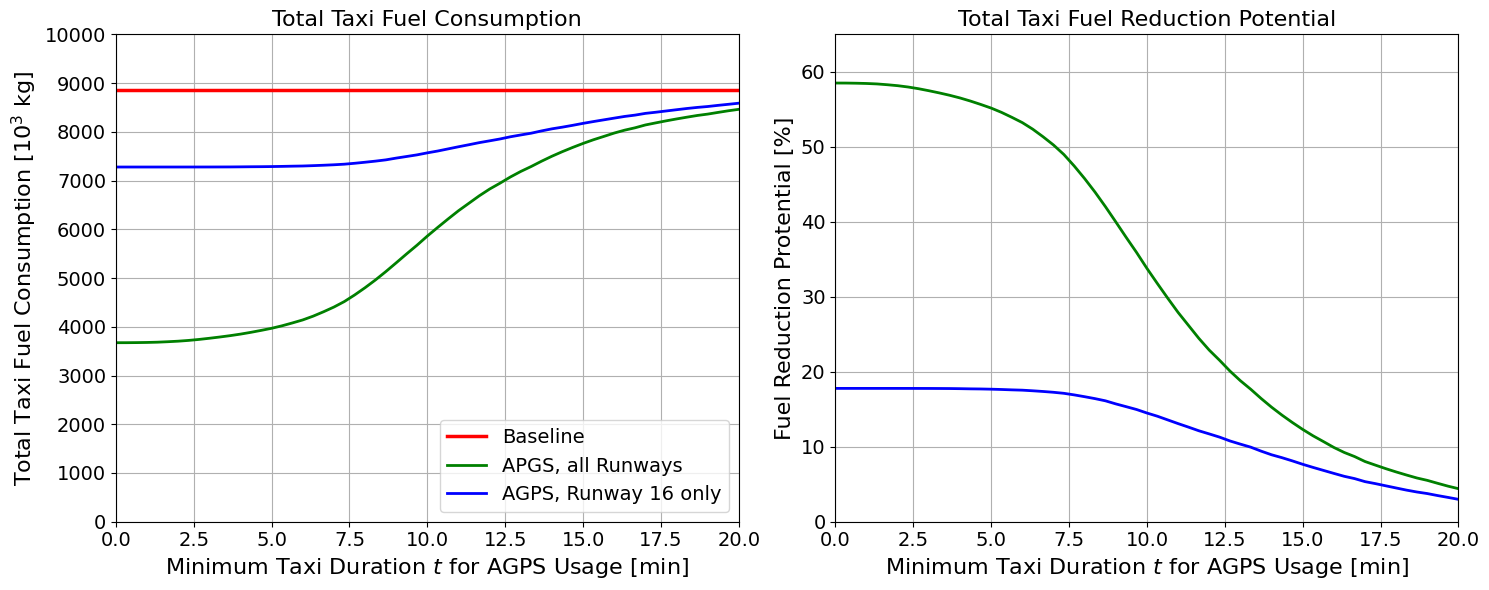

In [ ]:
baseline = df_movements['MESengine'].sum() + df_movements['MESapu'].sum() + df_movements['normTAXIengine'].sum()

minTaxiDuration = np.arange(0,1201,20)

AGPS_rwy_all = []
AGPS_rwy_16 = []

for taxiDuration in minTaxiDuration:

    MES_eng_apu = df_movements['MESengine'].sum() + df_movements['MESapu'].sum()

    # AGPS fuel consumption when AGPS is used for all RWYs
    agps_fuel = df_movements.loc[df_movements['taxiDuration'] >= datetime.timedelta(seconds=int(taxiDuration)),['extAGPSapu', 'extAGPStug']].sum().sum()   
    non_agps_fuel = df_movements[df_movements['taxiDuration']<datetime.timedelta(seconds=int(taxiDuration))]['normTAXIengine'].sum()
    AGPS_rwy_all.append(MES_eng_apu + agps_fuel + non_agps_fuel)

    # Fuel Consumption when AGPS is only used for RWY16
    agps_fuel = df_movements.loc[
        (df_movements['takeoffRunway'] == "16") & 
        (df_movements['taxiDuration'] >= datetime.timedelta(seconds=int(taxiDuration))),
        ['extAGPSapu', 'extAGPStug']
    ].sum().sum()
    non_agps_fuel = (
        df_movements.loc[
            (df_movements['takeoffRunway'] == "16") & 
            (df_movements['taxiDuration'] < datetime.timedelta(seconds=int(taxiDuration))),
            'normTAXIengine'
        ].sum() +
        df_movements.loc[
            df_movements['takeoffRunway'] != "16", 
            'normTAXIengine'
        ].sum()
    )
    AGPS_rwy_16.append(MES_eng_apu + agps_fuel + non_agps_fuel)

# Convert Taxi Duration to minutes
minTaxiDuration = minTaxiDuration/60

# Plot the results to see how minAGPSDuration affects total fuel consumption
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

######## Subplot 0 #########

axs[0].axhline(y=baseline, color='r', linestyle='-', linewidth=2.5, label='Baseline')

axs[0].plot(minTaxiDuration, 
            AGPS_rwy_all, 
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)

axs[0].plot(minTaxiDuration,
            AGPS_rwy_16,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[0].set_xlim((min(minTaxiDuration), max(minTaxiDuration)))
axs[0].set_ylim((0, baseline * 1.1))

# Customize the plot
axs[0].set_title('Total Taxi Fuel Consumption', fontsize=fontsize_title)
axs[0].set_xlabel('Minimum Taxi Duration $t$ for AGPS Usage [min]', fontsize=fontsize_xylabels)

# Define y-ticks from 0 to 11000 * 10^3 (actual values in kg)
y_ticks = np.arange(0, 11000 * 1e3, 1000 * 1e3)

# Apply the y-ticks to the left plot
axs[0].set_yticks(y_ticks)

# Convert y-tick labels to full kg values (1000, 2000, ..., 10000)
axs[0].set_yticklabels([f"{int(y / 1e3)}" for y in y_ticks], fontsize=fontsize_ticks)  

# Adjust the y-axis limit to ensure 0 at the bottom and 10000*10^3 at the top
axs[0].set_ylim(0, 10000 * 1e3)

# Update the y-axis label to reflect the proper unit
axs[0].set_ylabel(r'Total Taxi Fuel Consumption [$10^3$ kg]', fontsize=fontsize_xylabels)

axs[0].grid(True)
axs[0].legend(loc='lower right', fontsize=fontsize_ticks)

######## Subplot 1 #########

axs[1].plot(minTaxiDuration,
            (baseline - AGPS_rwy_all)/baseline * 100,
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)


axs[1].plot(minTaxiDuration,
            (baseline - AGPS_rwy_16)/baseline * 100,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[1].set_xlim((min(minTaxiDuration), max(minTaxiDuration)))
axs[1].set_ylim((0, 65))
axs[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[1].set_title('Total Taxi Fuel Reduction Potential', fontsize=fontsize_title)
axs[1].set_xlabel('Minimum Taxi Duration $t$ for AGPS Usage [min]', fontsize=fontsize_xylabels)
axs[1].set_ylabel('Fuel Reduction Protential [%]', fontsize=fontsize_xylabels)
axs[1].grid(True)


plt.tight_layout()
# Save the figure as a PDF
plt.savefig('taxi_fuel_MAY_SEP24.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

In [39]:
data = {
    'minTaxiDuration': minTaxiDuration,
    'baseline': baseline,
    'AGPS_rwy_all': AGPS_rwy_all,
    'AGPS_rwy_16': AGPS_rwy_16,
    'redPot_rwy_all': (baseline - AGPS_rwy_all)/baseline * 100,
    'redPot_rwy_16': (baseline - AGPS_rwy_16)/baseline * 100,
}

# Create DataFrame and filter rows
fuel_TaxiTime = pd.DataFrame(data)
fuel_TaxiTime = fuel_TaxiTime[fuel_TaxiTime['minTaxiDuration'].isin([0, 5, 10, 15, 20])]

# Convert fuel values to thousands
for col in ['baseline', 'AGPS_rwy_all', 'AGPS_rwy_16']:
    fuel_TaxiTime[col] = fuel_TaxiTime[col] / 1e3

# Convert reduction potentials to positive values
fuel_TaxiTime['redPot_rwy_all'] *= -1
fuel_TaxiTime['redPot_rwy_16'] *= -1

# Build LaTeX rows manually
latex_lines = []
for _, row in fuel_TaxiTime.iterrows():
    line = (
        f"{row['minTaxiDuration']:.1f} & "
        f"{row['baseline']:.1f} & "
        f"{row['AGPS_rwy_all']:.1f} & "
        f"{row['AGPS_rwy_16']:.1f} & "
        f"\\text{{{row['redPot_rwy_all']:+.1f} \\%}} & "
        f"\\text{{{row['redPot_rwy_16']:+.1f} \\%}} \\\\"
    )
    latex_lines.append(line)

# Join and print
latex_output = "\n".join(latex_lines)
print(latex_output)

0.0 & 8851.6 & 3673.0 & 7277.6 & \text{-58.5 \%} & \text{-17.8 \%} \\
5.0 & 8851.6 & 3968.7 & 7287.0 & \text{-55.2 \%} & \text{-17.7 \%} \\
10.0 & 8851.6 & 5861.2 & 7568.3 & \text{-33.8 \%} & \text{-14.5 \%} \\
15.0 & 8851.6 & 7761.9 & 8173.6 & \text{-12.3 \%} & \text{-7.7 \%} \\
20.0 & 8851.6 & 8461.5 & 8587.3 & \text{-4.4 \%} & \text{-3.0 \%} \\


### Determine Average Fuel Reduction of A320-Family Movement when using AGPS

In [47]:
# Fuel Saving Reduction of A320 Family

a320_family = ['A320', 'A321', 'A20N', 'A319', 'A21N']
df_filter = df_movements.query('typecode in @a320_family')
total_TaxiFuel = df_filter['MESengine'].sum() + df_filter['MESapu'].sum() + df_filter['normTAXIengine'].sum()
taxiFuel_per_movement = total_TaxiFuel / len(df_filter)


MES_eng_apu_A320 = df_filter['MESengine'].sum() + df_filter['MESapu'].sum()
agps_fuel_A320 = df_filter.loc[df_filter['taxiDuration'] >= datetime.timedelta(seconds=int(0)),['extAGPSapu', 'extAGPStug']].sum().sum()   
non_agps_fuel_A320 = df_filter[df_filter['taxiDuration']<datetime.timedelta(seconds=int(0))]['normTAXIengine'].sum()
total_AGPSFuel_A320 = MES_eng_apu_A320 + agps_fuel_A320 + non_agps_fuel_A320
taxiFuel_per_AGPSmovement = total_AGPSFuel_A320 / len(df_filter)

print(f"Average Fuel Consumption per A320 Family Taxi Movement: {taxiFuel_per_movement:.2f} kg, over {len(df_filter)} movements")
print(f"Average Fuel Consumption per A320 Family AGPS Taxi Movement: {taxiFuel_per_AGPSmovement:.2f} kg, over {len(df_filter)} movements")
print(f"Average Reduction per A320 Family Movement: {taxiFuel_per_movement-taxiFuel_per_AGPSmovement:.2f} kg")


Average Fuel Consumption per A320 Family Taxi Movement: 152.42 kg, over 21102 movements
Average Fuel Consumption per A320 Family AGPS Taxi Movement: 68.57 kg, over 21102 movements
Average Reduction per A320 Family Movement: 83.85 kg


### Taxi Fuel Consumption = f(Number of Tugs) 

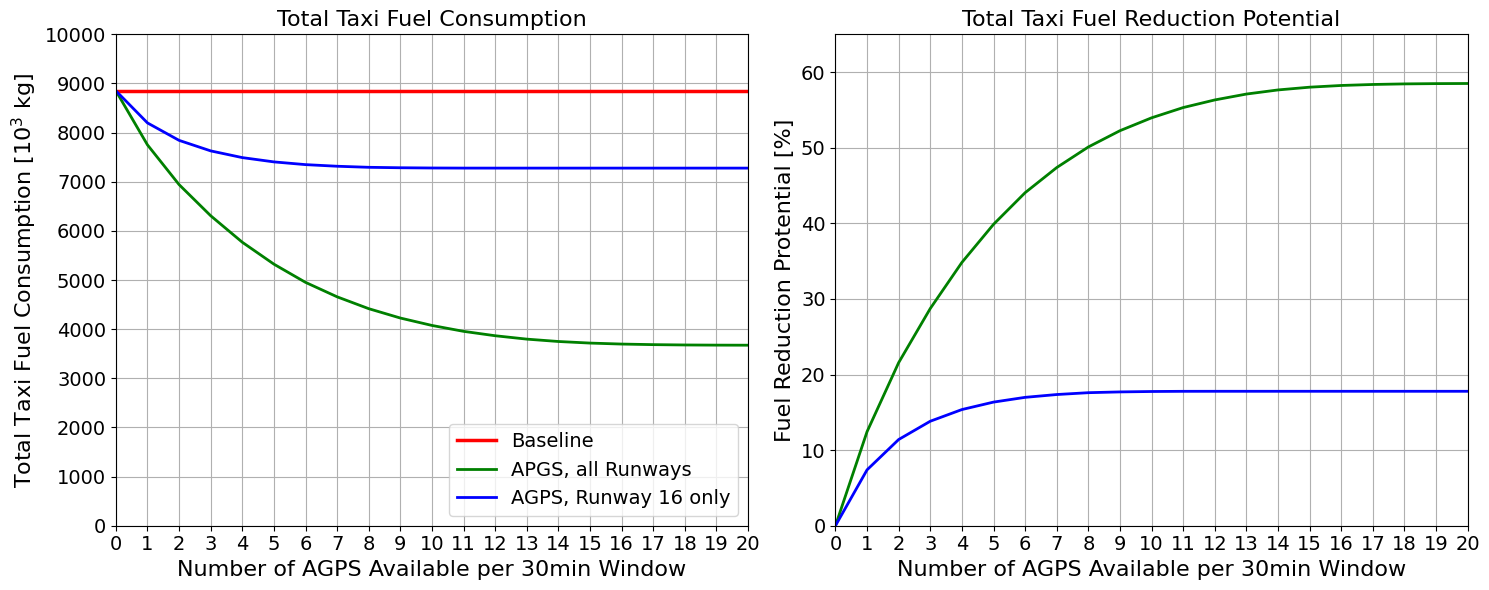

In [ ]:
# Create a new column for half-hour intervals
df_movements.loc[:, 'startTaxi_half_hour'] = df_movements['startTaxi'].dt.floor('30min')

# Sort by taxiDuration within each group
df_sorted = df_movements.sort_values(['startTaxi_half_hour', 'taxiDuration'], ascending=[True, False])


nTugs = np.arange(0,21,1)

AGPS_rwy_all = []
AGPS_rwy_16 = []
AGPS_rwy_all_pb = []
AGPS_rwy_16_pb = []


MES_eng_apu = df_movements['MESengine'].sum() + df_movements['MESapu'].sum()


def calculate_fuel(df, nTug, filter_condition=None):
    """
    Calculate the total fuel used based on tugs assigned to aircraft.

    Parameters:
    - df: DataFrame containing the flight data.
    - nTug: The number of tugs available.
    - filter_condition: A query string to filter the DataFrame, e.g., 'takeoffRunway == "16"'. If None, no filtering is applied.

    Returns:
    - Total fuel used (agps_fuel + non_agps_fuel).
    """
    
    if filter_condition:
        # Filter the DataFrame based on the condition provided
        df_filtered = df.query(filter_condition)
    else:
        # No filtering, use the entire DataFrame
        df_filtered = df
    
    # Assign tugs to the top 'nTug' movements based on the startTaxi_half_hour
    df_tugs = df_filtered.groupby('startTaxi_half_hour').head(nTug)
    
    # Calculate the fuel used by movements with tugs
    agps_fuel = df_tugs[['extAGPSapu', 'extAGPStug']].sum().sum()
    
    # Find the remaining movements that do not have tugs
    df_remaining = df[~df.index.isin(df_tugs.index)]
    
    # Calculate the fuel used by movements without tugs
    non_agps_fuel = df_remaining['normTAXIengine'].sum()
    
    # Total fuel used
    total_fuel = agps_fuel + non_agps_fuel
    
    return total_fuel


for nTug in nTugs:
    # Group by half-hour intervals and select the top nTug rows in each group -> These movements are assigned a tug.
    AGPS_rwy_all.append(MES_eng_apu + calculate_fuel(df_sorted, nTug))
    AGPS_rwy_all_pb.append(MES_eng_apu + calculate_fuel(df_sorted, nTug, filter_condition='isPushback'))


    # Same procedure, but only aircraft taking-off on runway 16 are assinged a tug
    AGPS_rwy_16.append(MES_eng_apu + calculate_fuel(df_sorted, nTug, filter_condition='takeoffRunway == "16"'))
    AGPS_rwy_16_pb.append(MES_eng_apu + calculate_fuel(df_sorted, nTug, filter_condition='(takeoffRunway == "16") & isPushback'))

# Plot the results to see how minAGPSDuration affects total fuel consumption
from matplotlib.ticker import MultipleLocator
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

######## Subplot 0 #########
# Add a horizontal line at a specific y-value (e.g., y=1000)
axs[0].axhline(y=baseline, color='r', linestyle='-', linewidth=2.5, label='Baseline')

axs[0].plot(nTugs, 
            AGPS_rwy_all, 
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)

axs[0].plot(nTugs,
            AGPS_rwy_16,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[0].set_xlim((min(nTugs), max(nTugs)))
axs[0].xaxis.set_major_locator(MultipleLocator(1))
#axs[0].set_ylim((0, baseline * 1.1))

# Customize the plot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[0].set_title('Total Taxi Fuel Consumption', fontsize=fontsize_title)
axs[0].set_xlabel('Number of AGPS Available per 30min Window', fontsize=fontsize_xylabels)

# Modify and display y-ticks
y_ticks = np.arange(0, 11000 * 1e3, 1000 * 1e3)  # 0, 1000*10^3, ..., 10000*10^3
axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels([f"{int(y / 1e3)}" for y in y_ticks], fontsize=fontsize_ticks)  
axs[0].set_ylim(0, 10000 * 1e3)
axs[0].set_ylabel(r'Total Taxi Fuel Consumption [$10^3$ kg]', fontsize=fontsize_xylabels)

axs[0].grid(True)
axs[0].legend(loc='lower right', fontsize=fontsize_ticks)


######## Subplot 0 #########
axs[1].plot(nTugs,
            (baseline - AGPS_rwy_all)/baseline * 100,
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)

axs[1].plot(nTugs,
            (baseline - AGPS_rwy_16)/baseline * 100,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[1].set_ylim((0, 65))
axs[1].set_xlim((min(nTugs), max(nTugs)))
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].set_title('Total Taxi Fuel Reduction Potential', fontsize=fontsize_title)
axs[1].set_xlabel('Number of AGPS Available per 30min Window', fontsize=fontsize_xylabels)
axs[1].set_ylabel('Fuel Reduction Protential [%]', fontsize=fontsize_xylabels)
axs[1].grid(True)


plt.tight_layout()
# Save the figure as a PDF
plt.savefig('taxi_fuel_ntugs_MAY_SEP24.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

In [42]:
data = {
    'nTugs': nTugs,
    'baseline': baseline,
    'AGPS_rwy_all': AGPS_rwy_all,
    'AGPS_rwy_16': AGPS_rwy_16,
    'redPot_rwy_all': (baseline - AGPS_rwy_all)/baseline * -100,
    'redPot_rwy_16': (baseline - AGPS_rwy_16)/baseline * -100,
}

# Create DataFrame
fuel_Tugs = pd.DataFrame(data)

# Filter relevant tug values
fuel_Tugs = fuel_Tugs[fuel_Tugs['nTugs'].isin([1, 2, 3, 4, 10, 15])]

# Convert fuel values to thousands
for col in ['baseline', 'AGPS_rwy_all', 'AGPS_rwy_16']:
    fuel_Tugs[col] = fuel_Tugs[col] / 1e3

# Rearrange columns
fuel_Tugs = fuel_Tugs[['nTugs', 'baseline', 'AGPS_rwy_all', 'AGPS_rwy_16', 'redPot_rwy_all', 'redPot_rwy_16']]

# Format LaTeX lines manually
latex_lines = []
for _, row in fuel_Tugs.iterrows():
    line = (
        f"{int(row['nTugs'])} & "
        f"{row['baseline']:.1f} & "
        f"{row['AGPS_rwy_all']:.1f} & "
        f"{row['AGPS_rwy_16']:.1f} & "
        f"\\text{{-{abs(row['redPot_rwy_all']):.1f} \\%}} & "
        f"\\text{{-{abs(row['redPot_rwy_16']):.1f} \\%}} \\\\"
    )
    latex_lines.append(line)

# Join and print
latex_output = "\n".join(latex_lines)
print(latex_output)

1 & 8851.6 & 7750.4 & 8197.4 & \text{-12.4 \%} & \text{-7.4 \%} \\
2 & 8851.6 & 6942.0 & 7842.2 & \text{-21.6 \%} & \text{-11.4 \%} \\
3 & 8851.6 & 6308.2 & 7628.1 & \text{-28.7 \%} & \text{-13.8 \%} \\
4 & 8851.6 & 5768.9 & 7491.4 & \text{-34.8 \%} & \text{-15.4 \%} \\
10 & 8851.6 & 4075.6 & 7280.0 & \text{-54.0 \%} & \text{-17.8 \%} \\
15 & 8851.6 & 3716.9 & 7277.6 & \text{-58.0 \%} & \text{-17.8 \%} \\
